# Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
%matplotlib inline
    
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

 ## Getting the dataset and getting insight of its some random data

In [293]:
dataset=pd.read_csv('F:\Adobe Photoshop CS6 Extended + Crack full version\caaa\postdataset.csv')
dataset.sample(5)

,Experience,Salary_bonus
11,12,42000
18,19,54589
21,22,61000
27,28,79800
2,3,17000


In [294]:
dataset.head(5)

,Experience,Salary_bonus
0,1,9000
1,2,14786
2,3,17000
3,4,19400
4,5,20000


## extracting the dataset into independent and dependent variable

In [295]:
independent_variable=dataset.iloc[:,0:1];
dependent_variable=dataset.iloc[:,1];

## ploting the relationship between independent adn dependent variable using scatter plot with sahpe Diamond

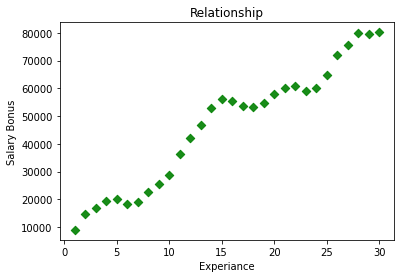

In [296]:
mp.scatter(independent_variable,dependent_variable,marker='D',color='green',alpha=0.9)
           # Marker will specifie the datapoint shape , color attribute color the datapoint with the specified color in it
            #, alpha(0-1) used for datapoint transpracy  
mp.xlabel('Experiance')
mp.ylabel('Salary Bonus')
mp.title('Relationship')
mp.show()   

### Importing the LinearRegression model attribute from sklearn.Linear_model library for making the linear model of a  non-linear dataset 

In [297]:
from sklearn.linear_model import LinearRegression
linear_regression_model=LinearRegression()

#### fitting the independent and dependent variable to the model

In [298]:
linear_regression_model.fit(independent_variable,dependent_variable)


LinearRegression()

Ploting the scatter plot for visulizing the result of our linear regression model on a non-linear dataset.

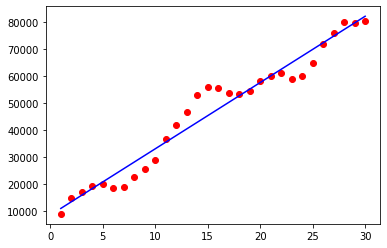

In [299]:
mp.scatter(independent_variable,dependent_variable,color='red')
mp.plot(independent_variable,linear_regression_model.predict(independent_variable),color='blue')
mp.show()

## Reshaping the dataset from 1d to 2d

In [300]:
independent_variable=dataset['Experience'].values.reshape(-1,1)
dependent_variable=dataset['Salary_bonus']

# Checking the accuracy of the dataset

In [301]:
linear_regression_model.score(independent_variable,dependent_variable)

0.9559564334759755

## model accuracy is still not that much good

## Predicting the accuracy by giving some unknown sample to model that our model has not seen before

In [302]:
print(linear_regression_model.predict([[80]]))
linear_regression_model.predict([[35]])

[204502.55253986]


array([94293.02751205])

In [303]:
independent_variable=dataset['Experience']
dependent_variable=dataset['Salary_bonus']

# Let's make a polynominal regression model for our non linear dataset to increase its accuracy

In [304]:
function_to_fit_datapoint=np.polyfit(independent_variable,dependent_variable,2)
polynomial_model=np.poly1d(function_to_fit_datapoint)
print(polynomial_model)
function_to_fit_datapoint


       2
-19.5 x + 3054 x + 5351


array([ -19.49995034, 3053.59901676, 5350.51625616])

In [305]:
def PlotPolly(model, independent_variable, dependent_variabble):
    x_new= np.linspace(15, 55, 100)
    y_new =model(x_new)
    mp.plot(independent_variable, dependent_variabble,'.' ,x_new,y_new,'-')
    mp.title('Polynomial Fit with Matplotlib for Price')
    ax = mp.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = mp.gcf()
    mp.xlabel('Experiance')
    mp.ylabel('Salary Bonus')
    mp.show()
    mp.close()


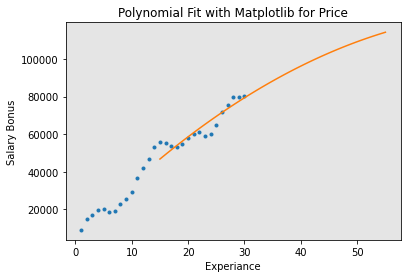

In [306]:
PlotPolly(polynomial_model,independent_variable,dependent_variable)


In [307]:
from sklearn.metrics import r2_score

In [308]:
r2_score(dependent_variable,polynomial_model(independent_variable))

0.9595764339535613

## the R2_score showing that our polynimonal model is best for predicting values in term of Linear regression

# Using Scatter plot to visualize Linear and polynominal model on our dataset

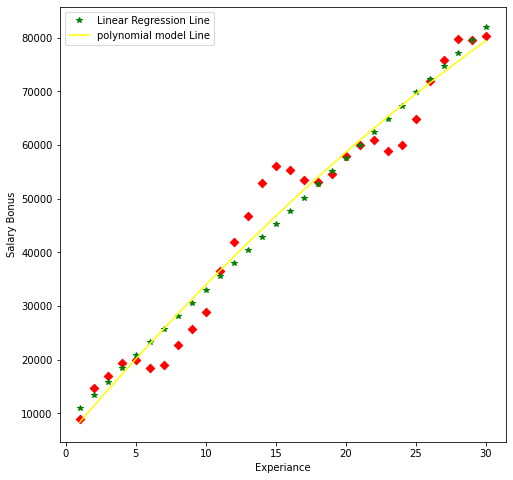

In [309]:
mp.figure(figsize=(8,8))
mp.scatter(independent_variable,dependent_variable,color='red',marker="D")
independent_variable=dataset['Experience'].values.reshape(-1,1)
mp.plot(independent_variable,linear_regression_model.predict(independent_variable),('g*'),label='Linear Regression Line')
mp.plot(independent_variable,polynomial_model(independent_variable),color='yellow',label='polynomial model Line')
mp.xlabel('Experiance')
mp.ylabel('Salary Bonus')
mp.legend()
mp.show()

In [310]:
print('Accuracy using polynomial regression model')
print('Actual points');print(dataset.iloc[0:5,0:2])
print('Predicted values')
polynomial_model(dataset.iloc[0:5,0:1])

Accuracy using polynomial regression model
Actual points
   Experience  Salary_bonus
0           1          9000
1           2         14786
2           3         17000
3           4         19400
4           5         20000
Predicted values


array([[ 8384.61532258],
       [11379.71448832],
       [14335.81375338],
       [17252.91311775],
       [20131.01258144]])